## Entrega 6 - Gramaticas y lenguajes formales
#### Alumno: Carlos Martín Sanz


In [113]:
from pynini import *

In [114]:
# Funcion que prueba el fst programado que he sacado de internet
# link: https://colab.research.google.com/drive/1K6bmCurPR7LhxDKD--L-7P90gafmdFav?usp=sharing#scrollTo=T7Do7rvR-TqK

def pruebaFst(fst):
    return list(shortestpath(fst, nshortest=15).paths().ostrings())

In [115]:
# Definicion de la funcion de las tablas de simbolos

def tabla_de_simbolos():
    
    alfabeto = list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz{}.-')
    
    ts = SymbolTable()
    ts.add_symbol('ϵ', 0)
    
    for simbolo in alfabeto:
        ts.add_symbol(simbolo, ord(simbolo))
    return ts

### #####################################

### 1.Aútomata N 

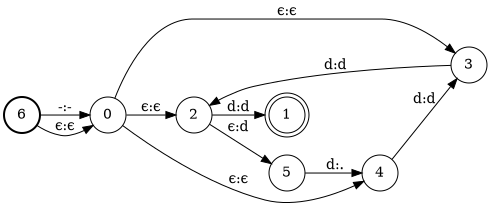

In [116]:
# Creamos el Fst

automataN = Fst()
sym = tabla_de_simbolos()

# Añadimos los nodos que va a tener nuestro Fst

nodo0_2 = automataN.add_state()
nodo1_2 = automataN.add_state()
nodo2_2 = automataN.add_state()
nodo3_2 = automataN.add_state()
nodo4_2 = automataN.add_state()

# Añadimos los arcos

automataN.add_arc(nodo0_2, Arc(ord('d'),ord('d'), 0, nodo1_2))
automataN.add_arc(nodo1_2, Arc(ord('d'),ord('d'), 0, nodo2_2))
automataN.add_arc(nodo2_2, Arc(ord('d'),ord('d'), 0,nodo3_2))
automataN.add_arc(nodo3_2, Arc(ord('d'),ord('.'), 0, nodo4_2))
automataN.add_arc(nodo4_2, Arc(0,ord('d'),0, nodo1_2))

# Nodos finales del automata N

automataN.set_final(nodo1_2)
automataN.set_final(nodo2_2)
automataN.set_final(nodo3_2)

# Invierto el automata puesto que con lo anterior nos ponia un . cada 3 ceros que leia
# por la izquierda, y nosotros queremos cada 3 por la derecha

automataNfinal = reverse(automataN)

nodo5_2 = automataNfinal.add_state()

# Arcos que detectan si hay un menos (mantiene el numero en negrativo) o si no lo hay

automataNfinal.add_arc(nodo5_2, Arc(ord('-'),ord('-'),0, nodo0_2))
automataNfinal.add_arc(nodo5_2, Arc(0,0,0, nodo0_2))

# Nodo de inicio del automata invertido y el nodo de fin

automataNfinal.set_start(nodo5_2)
automataNfinal.set_final(nodo1_2)

automataNfinal.set_input_symbols(sym)
automataNfinal.set_output_symbols(sym)


In [117]:
print("------------------ PRUEBAS ------------------")
pruebaFst("d" @ automataNfinal)


------------------ PRUEBAS ------------------


['d']

In [118]:
pruebaFst("-d" @ automataNfinal)


['-d']

In [119]:
pruebaFst("dddd" @ automataNfinal)


['d.ddd']

In [120]:
pruebaFst("-dddd" @ automataNfinal)


['-d.ddd']

In [121]:
pruebaFst("ddddddddd" @ automataNfinal)


['ddd.ddd.ddd']

In [122]:
pruebaFst("-ddddddddd" @ automataNfinal)

['-ddd.ddd.ddd']

### #####################################

### 2.Autómata R 

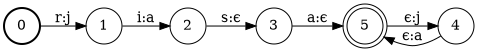

In [123]:
# Creamos el Fst

automataR = Fst()
sym = tabla_de_simbolos()

# Añadimos los nodos que va a tener nuestro Fst

nodo0 = automataR.add_state()
nodo1 = automataR.add_state()
nodo2 = automataR.add_state()
nodo3 = automataR.add_state()
nodo4 = automataR.add_state()
nodo5 = automataR.add_state()

# Añadimos los arcos

automataR.add_arc(nodo0, Arc(ord('r'), ord('j'), 0, nodo1))
automataR.add_arc(nodo1, Arc(ord('i'), ord('a'), 0, nodo2))
automataR.add_arc(nodo2, Arc(ord('s'), 0, 0, nodo3))
automataR.add_arc(nodo3, Arc(ord('a'), 0, 0, nodo5))
automataR.add_arc(nodo5, Arc(0, ord('j'), 0, nodo4))
automataR.add_arc(nodo4, Arc(0, ord('a'), 0, nodo5))

# Defino el nodo de inicio y el nodo de fin

automataR.set_start(nodo0)
automataR.set_final(nodo5)

automataR.set_input_symbols(sym)
automataR.set_output_symbols(sym)

In [131]:
# Esta funcion prueba 15 veces (las mas pequeñas de 1 a 15 ja's) el automata programado

pruebaFst("risa" @ automataR)

['jajaja',
 'jajajaja',
 'jajajajajajaja',
 'jajajajajajajajajajajaja',
 'jajajajajajajajajajajajajajaja',
 'jajajajajajajajajajaja',
 'ja',
 'jajajajajaja',
 'jajajajajajajaja',
 'jajajajajajajajajajajajaja',
 'jaja',
 'jajajajaja',
 'jajajajajajajajajajajajajaja',
 'jajajajajajajajajaja',
 'jajajajajajajajaja']

### #####################################

### 3.Autómata C  

In [132]:
# Creamos el Fst

automataC = Fst()
sym = tabla_de_simbolos()

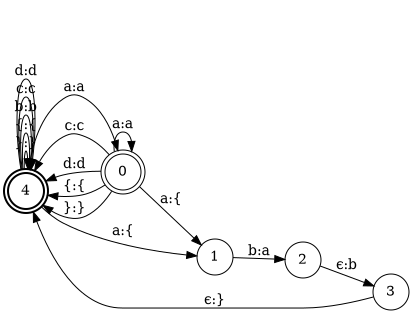

In [133]:
# Añadimos los nodos que va a tener nuestro Fst

nodo0_1 = automataC.add_state()
nodo1_1 = automataC.add_state()
nodo2_1 = automataC.add_state()
nodo3_1 = automataC.add_state()
nodo4_1 = automataC.add_state()

# Añadimos los arcos

automataC.add_arc(nodo4_1, Arc(ord('}'),ord('}'), 0, nodo4_1))
automataC.add_arc(nodo4_1, Arc(ord('{'),ord('{'), 0, nodo4_1))
automataC.add_arc(nodo4_1, Arc(ord('b'),ord('b'), 0, nodo4_1))
automataC.add_arc(nodo4_1, Arc(ord('c'),ord('c'), 0, nodo4_1))
automataC.add_arc(nodo4_1, Arc(ord('d'),ord('d'), 0, nodo4_1))
automataC.add_arc(nodo4_1, Arc(ord('a'),ord('a'), 0, nodo0_1))

automataC.add_arc(nodo0_1, Arc(ord('a'),ord('a'), 0, nodo0_1))
automataC.add_arc(nodo0_1, Arc(ord('c'),ord('c'), 0, nodo4_1))
automataC.add_arc(nodo0_1, Arc(ord('d'),ord('d'), 0, nodo4_1))
automataC.add_arc(nodo0_1, Arc(ord('{'),ord('{'), 0, nodo4_1))
automataC.add_arc(nodo0_1, Arc(ord('}'),ord('}'), 0, nodo4_1))

automataC.add_arc(nodo0_1, Arc(ord('a'), ord('{'), 0, nodo1_1))
automataC.add_arc(nodo4_1, Arc(ord('a'), ord('{'), 0, nodo1_1))
automataC.add_arc(nodo1_1, Arc(ord('b'), ord('a'), 0, nodo2_1))
automataC.add_arc(nodo2_1, Arc(0, ord('b'), 0, nodo3_1))
automataC.add_arc(nodo3_1, Arc(0, ord('}'), 0, nodo4_1))

# Defino el nodo de inicio y el nodo de fin

automataC.set_start(nodo4_1)
automataC.set_final(nodo0_1)
automataC.set_final(nodo4_1)

automataC.set_input_symbols(sym)
automataC.set_output_symbols(sym)

In [134]:
print("------------------ PRUEBAS ------------------")
pruebaFst("caaabbabc" @ automataC)

------------------ PRUEBAS ------------------


['caa{ab}b{ab}c']

In [135]:
pruebaFst("caababaabbabc" @ automataC)

['ca{ab}{ab}a{ab}b{ab}c']

In [136]:
pruebaFst("caaaaaaaaabaaabbbbabababacccccddddccadab"  @ automataC)

['caaaaaaaa{ab}aa{ab}bbb{ab}{ab}{ab}acccccddddccad{ab}']